In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

- # Carga archivo de datos.


In [3]:
df= pd.read_csv('C:\\AcademiaPython\\PI_MLOps_STEAM\\final.csv')

- # Vemos información y contol de nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102382 entries, 0 to 102381
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          102382 non-null  int64 
 1   genres              102382 non-null  object
 2   title               102382 non-null  object
 3   item_id             102382 non-null  int64 
 4   year                102382 non-null  int64 
 5   user_id             102382 non-null  object
 6   recommend           102382 non-null  bool  
 7   sentiment_analysis  102382 non-null  int64 
 8   steam_id            102382 non-null  int64 
 9   playtime_forever    102382 non-null  int64 
 10  playtime_2weeks     102382 non-null  int64 
 11  year_posted         102382 non-null  int64 
dtypes: bool(1), int64(8), object(3)
memory usage: 8.7+ MB


In [5]:
df.isna().sum()

Unnamed: 0            0
genres                0
title                 0
item_id               0
year                  0
user_id               0
recommend             0
sentiment_analysis    0
steam_id              0
playtime_forever      0
playtime_2weeks       0
year_posted           0
dtype: int64

- # Trabajo columnas para el analísis 

In [6]:
#Creo una columna 'recomendación_int' con 1= True y 0 = False
df['recommend_int'] =df['recommend'].astype(int)


In [7]:
# Pongo en una nueva variable el df borrando la columna 'Unnamed: 0 '
df1 = df.drop('Unnamed: 0', axis= 1)

In [17]:
df1

,genres,title,item_id,year,user_id,recommend,sentiment_analysis,steam_id,playtime_forever,playtime_2weeks,year_posted,recommend_int
0,Action,Carmageddon Max Pack,282010,1997,InstigatorAU,True,1,76561198067728137,466,0,0,1
1,Indie,Carmageddon Max Pack,282010,1997,InstigatorAU,True,1,76561198067728137,466,0,0,1
2,Racing,Carmageddon Max Pack,282010,1997,InstigatorAU,True,1,76561198067728137,466,0,0,1
3,Action,Half-Life,70,1998,EizanAratoFujimaki,True,1,76561198160640899,1395,102,2015,1
4,Action,Half-Life,70,1998,GamerFag,True,0,76561198006592023,590,0,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...
102377,Action,Counter-Strike: Condition Zero,80,2004,76561198015050660,False,1,76561198015050660,2416,0,2014,0
102378,Action,Counter-Strike: Condition Zero,80,2004,76561198023508728,False,1,76561198023508728,15,0,2014,0
102379,Action,Counter-Strike: Condition Zero,80,2004,green290,True,1,76561198051829216,442,5,2015,1
102380,Action,Counter-Strike: Condition Zero,80,2004,174gamecuman700kngkakak,True,1,76561198099895210,72,0,2014,1


In [9]:
df1.to_csv('final1.csv')

- # Grafico juegos mas recomendados
 

In [36]:
# Distribución de la registros por recomend (True,False)
recomendado = df1["recommend"].value_counts()
porcentaje = 100*df1["recommend"].value_counts(normalize=True)
pd.DataFrame({"Recomendados":recomendado, "Porcentaje":porcentaje.round(2)})

,Recomendados,Porcentaje
recommend,,
True,91031,88.91
False,11351,11.09


<Figure size 1200x600 with 0 Axes>

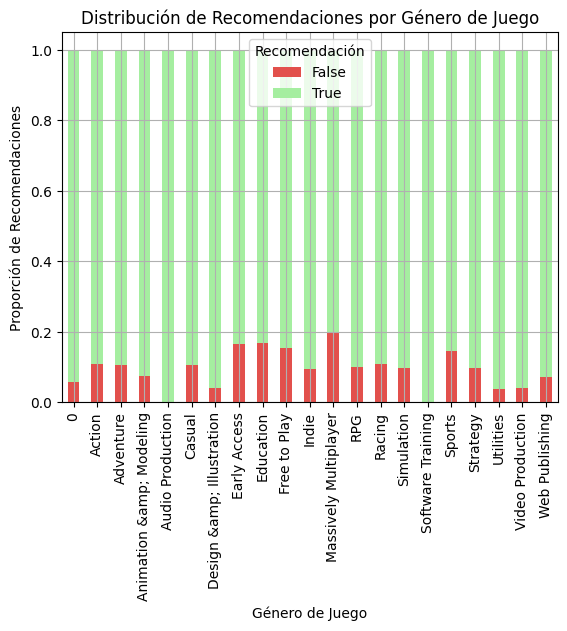

In [43]:


# Agrupar los datos por género de juego y calcular la proporción de recomendaciones buenas (1) y malas (0)
genre_recommendations = df1.groupby(['genres', 'recommend_int']).size().unstack(fill_value=0)
genre_recommendations = genre_recommendations.div(genre_recommendations.sum(axis=1), axis=0)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
genre_recommendations.plot(kind='bar', stacked=True, color= ('#e2504c','#a5eea0'))
plt.xlabel('Género de Juego')
plt.ylabel('Proporción de Recomendaciones')
plt.title('Distribución de Recomendaciones por Género de Juego')
plt.legend(title='Recomendación', labels=['False', 'True'])
plt.grid(True)
plt.show()


- Podemos mostrar la recomendaciones de usuarios segun el genero de los juegos.

- # Analisis de sentimiento segun año


In [14]:
graf1= df.query('year_posted != 0')


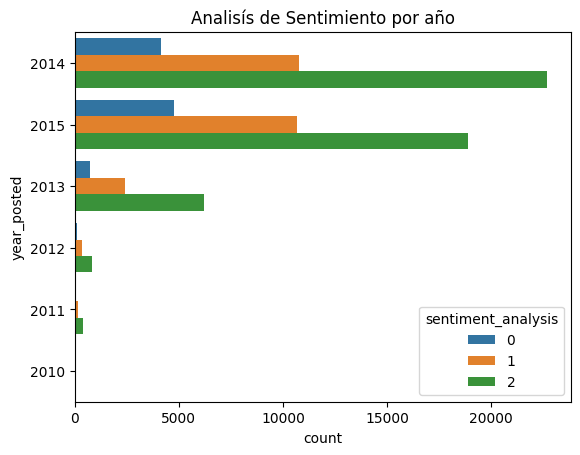

In [17]:
# Analisis de sentimientos por años

sns.countplot(y = 'year_posted', data= graf1, order=graf1['year_posted'].value_counts().index[0:], hue=df['sentiment_analysis'])
plt.title('Analisís de Sentimiento por año')
plt.show()


- En este caso vemos que en 2014 fue el año con más comentarios positivos por parte de los usuarios.


- # Analisís de año con mas juegos publicados

In [44]:
graf2= df1.query('year != 0')

In [45]:
# Contar cuántos juegos se publicaron por año
c_year = graf2['year'].value_counts().sort_index()

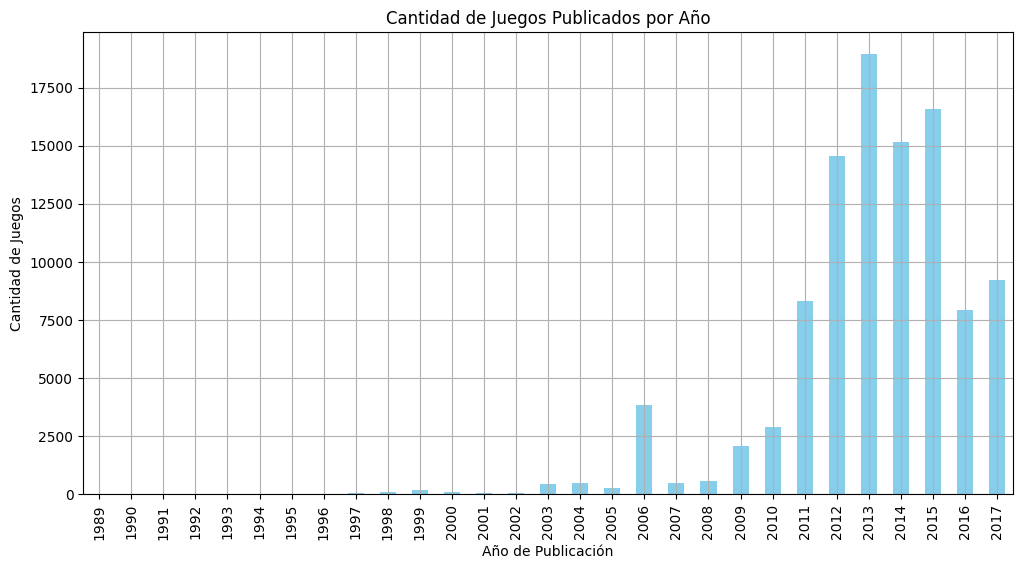

In [46]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
c_year.plot(kind='bar', color='skyblue')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos Publicados por Año')
plt.grid(True)
plt.show()

- En el año 2013 hubo más publicaciones de juego , eso explicaria porque en el año 2014 fue el año con más recomendaciones. Dado que en el mundo 'GAMER' el tiempo promedio de 'popularidad' de un juego son los primeros años de publicación dejando relación con lo dicho al comienzo.
 